In [2]:
import numpy as np
import matplotlib.pyplot as plt
from TSP import plot_route_with_labels, plot_route
from TSP_SO import SingleObjectiveTSP
from TSP_MO import MultipleObjectiveTSP

In [3]:
dist_central = np.loadtxt("data/CustDist_WHCentral.csv", skiprows=1, delimiter=",")[:,1:]
xy_central   = np.loadtxt("data/CustXY_WHCentral.csv", skiprows=1, delimiter=",")[:,1:].T

dist_corner  = np.loadtxt("data/CustDist_WHCorner.csv", skiprows=1, delimiter=",")[:,1:]
xy_corner    = np.loadtxt("data/CustXY_WHCorner.csv", skiprows=1, delimiter=",")[:,1:].T

orders       = np.loadtxt("data/CustOrd.csv", skiprows=1, delimiter=",")[:,1]

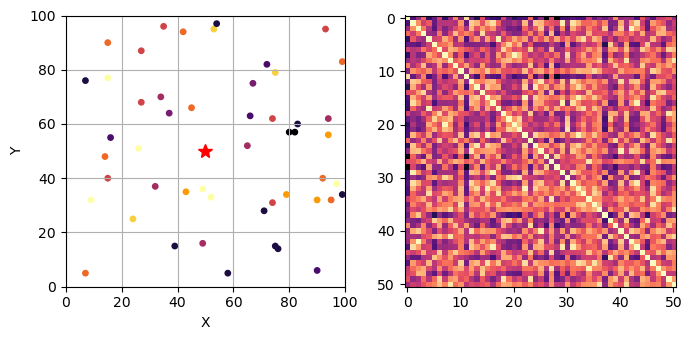

In [23]:
fig, ax = plt.subplots(ncols=2, figsize=(7,3.5))

ax[0].set(xlabel="X", ylabel="Y", xlim=(0,100), ylim=(0,100))

ax[0].scatter(xy_central[0][1:], xy_central[1][1:], marker="o", s=15, c=orders[1:], cmap="inferno_r")
ax[0].plot(xy_central[0][0], xy_central[1][0], ls="", marker="*", ms=10, c="red")
ax[0].grid()

im = ax[1].imshow(dist_corner, cmap="magma_r")
# fig.colorbar(im, ax=ax[1])#, label='Interactive colorbar')
plt.tight_layout()

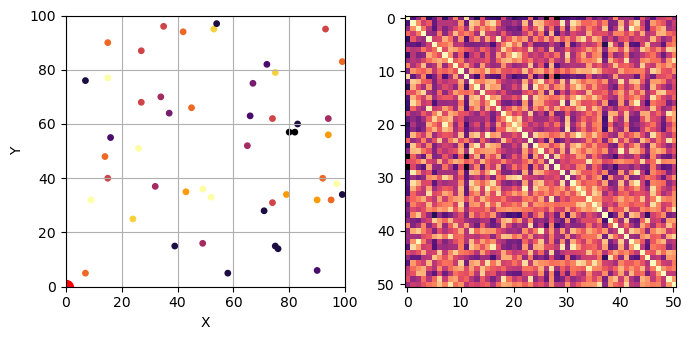

In [ ]:
fig, ax = plt.subplots(ncols=2, figsize=(7,3.5))

ax[0].set(xlabel="X", ylabel="Y", xlim=(0,100), ylim=(0,100))

ax[0].scatter(xy_corner[0][1:], xy_corner[1][1:], marker="o", s=15, c=orders[1:], cmap="inferno_r")
ax[0].plot(xy_corner[0][0], xy_corner[1][0], ls="", marker="o", ms=10, c="red")
ax[0].grid()

im = ax[1].imshow(dist_corner, cmap="magma_r")
# fig.colorbar(im, ax=ax[1])#, label='Interactive colorbar')
plt.tight_layout()

# Exhaustive search:

## Central

In [4]:
from itertools import permutations

In [7]:
EA = SingleObjectiveTSP(ind_size = 10,
                        distances= dist_central,
                        orders   = orders,
                        coords   = xy_central.T[1:10+1],
                        pop_size = 40,
                        use_heuristic= False,
                        elitist_size = 3,
                        CXPB  = 0.8,
                        INVPB = 0.8)

In [8]:
routes = list(permutations(range(1,11)))

best_route = routes[0]
min_dist  = 1e6
distances = []

for route in routes:
    dist = EA._evaluate(route)[0]
    distances += [dist]
    if dist < min_dist:
        min_dist = dist
        best_route = route

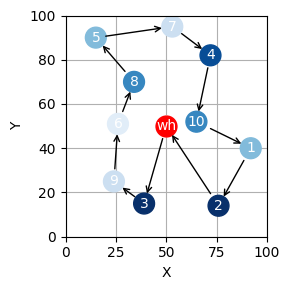

In [48]:
plot_route_with_labels([3,9,6,8,5,7,4,10,1,2], xy_central.T[:11], orders[:11], figsize=(3.,3.))
plt.tight_layout()
plt.savefig("images/heuristic_route.pdf")

Minimum distance: 306.0


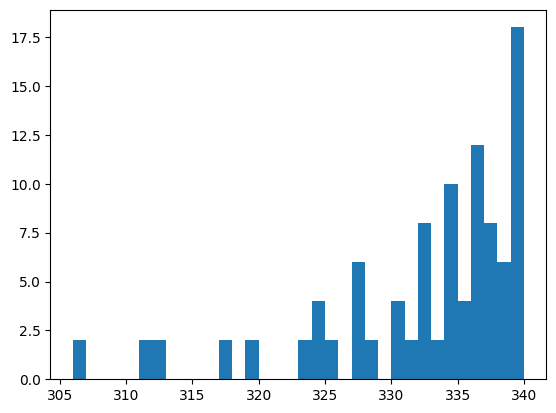

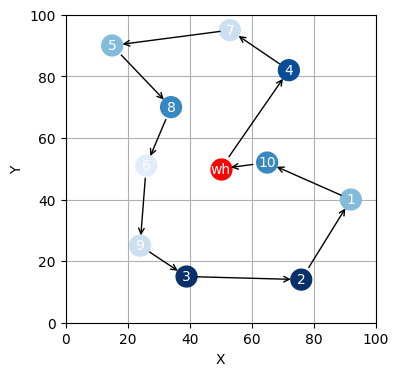

In [9]:
print(f"Minimum distance: {min_dist}")
distances.sort()
_=plt.hist(distances[:100],bins=int(distances[:100][-1]-distances[0]))
plot_route_with_labels(best_route, xy_central.T[:11], orders[:11])

In [10]:
EA = MultipleObjectiveTSP(ind_size = 10,
                            distances= dist_central,
                            orders   = orders,
                            coords   = xy_central.T[1:10+1],
                            pop_size = 100,
                            CXPB  = 0.8,
                            INVPB = 0.8)

In [11]:
sols_central = np.vectorize(EA._evaluate,signature="(n)->(),()")(routes)

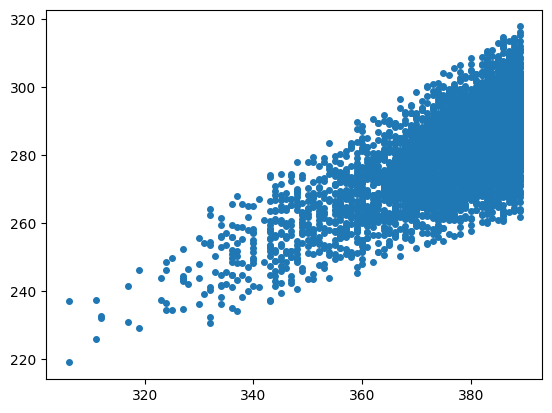

In [12]:
points = sols_central[0] < 390
plt.scatter(sols_central[0][points], sols_central[1][points], s=4**2)

## Corner

In [13]:
EA = SingleObjectiveTSP(ind_size = 10,
                        distances= dist_corner,
                        orders   = orders,
                        coords   = xy_corner.T[1:10+1],
                        pop_size = 40,
                        use_heuristic= False,
                        elitist_size = 3,
                        CXPB  = 0.8,
                        INVPB = 0.8)

In [14]:
routes = list(permutations(range(1,11)))

best_route_corner = routes[0]
min_dist  = 1e6
distances_corner = []

for route in routes:
    dist = EA._evaluate(route)[0]
    distances_corner += [dist]
    if dist < min_dist:
        min_dist = dist
        best_route_corner = route

Minimum distance: 342.0


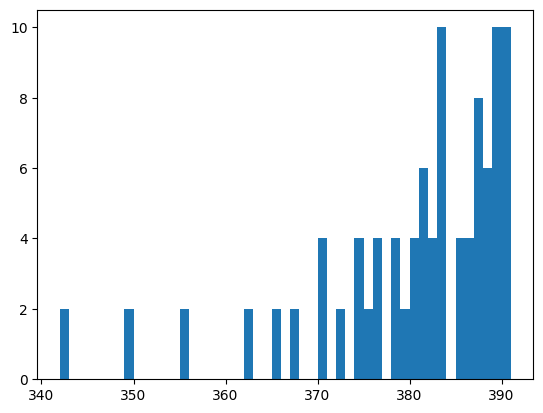

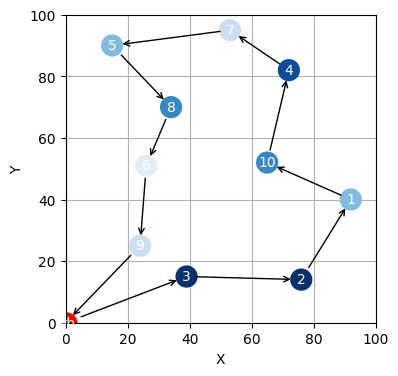

In [15]:
print(f"Minimum distance: {min_dist}")
distances_corner.sort()
_=plt.hist(distances_corner[:100],bins=int(distances_corner[:100][-1]-distances_corner[0]))
plot_route_with_labels(best_route_corner, xy_corner.T[:11], orders[:11])

In [16]:
EA = MultipleObjectiveTSP(ind_size = 10,
                            distances= dist_corner,
                            orders   = orders,
                            coords   = xy_corner.T[1:10+1],
                            pop_size = 100,
                            CXPB  = 0.8,
                            INVPB = 0.8)

In [17]:
sols_corner = np.vectorize(EA._evaluate,signature="(n)->(),()")(routes)

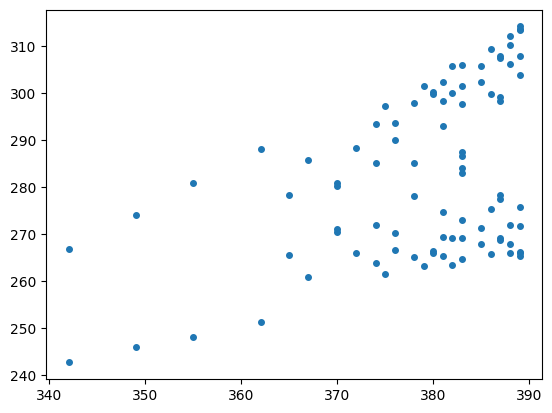

In [18]:
points = sols_corner[0] < 390
plt.scatter(sols_corner[0][points], sols_corner[1][points], s=4**2)

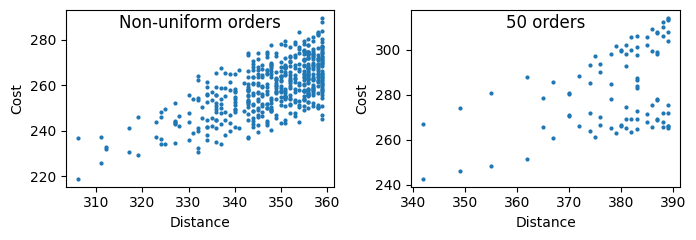

In [39]:
fig, ax = plt.subplots(figsize=(7,2.5), ncols=2)
ax[0].set(xlabel="Distance", ylabel="Cost")
ax[1].set(xlabel="Distance", ylabel="Cost")

ax[0].set_title("Non-uniform orders", y=0.85)
ax[1].set_title("50 orders", y=0.85)

ax[0].scatter(sols_central[0][sols_central[0]<360], sols_central[1][sols_central[0]<360], s=2**2)
ax[1].scatter(sols_corner[0][points], sols_corner[1][points], s=2**2)
fig.tight_layout()
fig.savefig("images/exhaustive_search.pdf")